# Image plates of duckweed in growth assay experiment

Ensure the following before running anything in this notebook:
 - The machine is switched on, connected to the computer and all axes have been homed. 
 - The camera tool is accessible and in position 1 on the Jubilee
 
 Once those steps are complete run the cells in this notebook in order

In [1]:
#Importing python libraries downloaded from the internet and those saved locally
import serial 
from serial.tools import list_ports
import yaml
import matplotlib
matplotlib.use('TkAgg') #This is a specific back end of matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2 as cv2
# import time
import pandas as pd
import glob
import json
import ipywidgets as widgets
# from Ipython.display import display, Image
import threading
from datetime import date


from utils.MachineUtils import * #Local library
from utils.CameraUtils import * #Local library. #Note that this library requirs a package that can only be installed on raspbery pi. 
import utils.PlatePositionUtils as pp #Local library
import utils.ImageCaptureUtils as im

In [7]:
ports = serial.tools.list_ports.comports()
ser = serial.Serial('/dev/ttyACM0', 115200) #Port address and Baudrate (info transfer rate)
port = '/dev/ttyACM0'
m = MachineCommunication(port)
ser.write(b'G90\n') #Command to make sure the Jubilee is using absolute as opposed to relative positioning
m.toolChange(1)

### 1. Define directories and file names

In [2]:
#Directory that hosts experiment set up file
expt_setup_dir = '/home/pi/duckbot/notebooks/Demo/Test_experiments/'

#Experimental set up file name, including .json
expt_setup_filename = 'Expt_082222.json'

#Host directory that you want to host the folder with your image files. End with forward slash
data_host_dir = '/home/pi/Documents/Data/'

#Name you want to use for the folder with your image files
data_dir = 'Expt_082222'
expt_name = 'Expt_082222' #Will be used as prefix for file names

#Where data will be saved
output_data_dir = data_host_dir + data_dir  

isExist = os.path.exists(output_data_dir)
if not isExist:
  # Create a new directory because it does not exist 
    os.makedirs(output_data_dir)
    print("The new directory is created!")
    
print("Image files will be saved to:")
print(output_data_dir)


Image files will be saved to:
/home/pi/Documents/Data/Expt_082222


## 2. Load plates into machine

In [4]:
#Drop bed down and add plates
plates_to_image = im.pull_plates_to_image(expt_setup_dir, expt_setup_filename)

m.moveTo(z=100)

print(f'Load the following experimental plates into the appropriate positions on the bed: {plates_to_image}')
print("Add plates to the bed. Hit any button to confirm and proceed")
input()

Load the following experimental plates into the appropriate positions on the bed: ['1', '2', '3']
Add plates to the bed. Hit any button to confirm and proceed
button


'button'

### 3. Focus camera
Run the cells below. It will move the camera over the first well of the first plate and then pop up a live camera window. Manually adjust the focus to the desired point by twisting the housing of the camera lens. You will need to loosen the nut that holds the lens in place to be able to adjust the focus and then tighten it again once you are done. Then hit the escape key to close the window

In [5]:
#Move camera over first well to be imaged
plates_to_image = im.pull_plates_to_image(expt_setup_dir, expt_setup_filename)
im.move_to_first_well(m, plates_to_image)

In [10]:
#Open a live video window
cap = cv2.VideoCapture(0) #Note that the index corresponding to your camera may not be zero but this is the most common default

while True:
    ret, frame = cap.read()
    cv2.imshow('Input', frame)
    c = cv2.waitKey(1)
    if c ==27: #27 is the built in code for ESC so press escape to close the window. 
        break 
        
cap.release()

cv2.destroyAllWindows()

### 3. Capture and save images

In [7]:
df_with_well_coords = pp.add_well_coords_to_df_from_file(expt_setup_dir, expt_setup_filename)
# # print(df_with_well_coords)
# os.chdir(output_data_dir)

im.image_plates(m, df_with_well_coords, output_data_dir, expt_name)

plates = list(np.unique(df_with_well_coords['Plate']))
plates = [int(x[-1]) for x in plates]

# im.create_plate_image_grid(df_with_well_coords, output_data_dir)

Imaging well A1
Imaging well A2
Imaging well A3
Imaging well A4
Imaging well A5
Imaging well A6
Imaging well B1
Imaging well B2
Imaging well B3
Imaging well B4
Imaging well B5
Imaging well B6
Imaging well C1
Imaging well C2
Imaging well C3
Imaging well C4
Imaging well C5
Imaging well C6
Imaging well D1
Imaging well D2
Imaging well D3
Imaging well D4
Imaging well D5
Imaging well D6
Imaging well A1
Imaging well A2
Imaging well A3
Imaging well A4
Imaging well A5
Imaging well A6
Imaging well B1
Imaging well B2
Imaging well B3
Imaging well B4
Imaging well B5
Imaging well B6
Imaging well C1
Imaging well C2
Imaging well C3
Imaging well C4
Imaging well C5
Imaging well C6
Imaging well D1
Imaging well D2
Imaging well D3
Imaging well D4
Imaging well D5
Imaging well D6
Imaging well A1
Imaging well A2
Imaging well A3
Imaging well A4
Imaging well A5
Imaging well A6
Imaging well B1
Imaging well B2
Imaging well B3
Imaging well B4
Imaging well B5
Imaging well B6


NameError: name 'create_plate_image_grid' is not defined

In [3]:
print(date.today())

2022-08-22


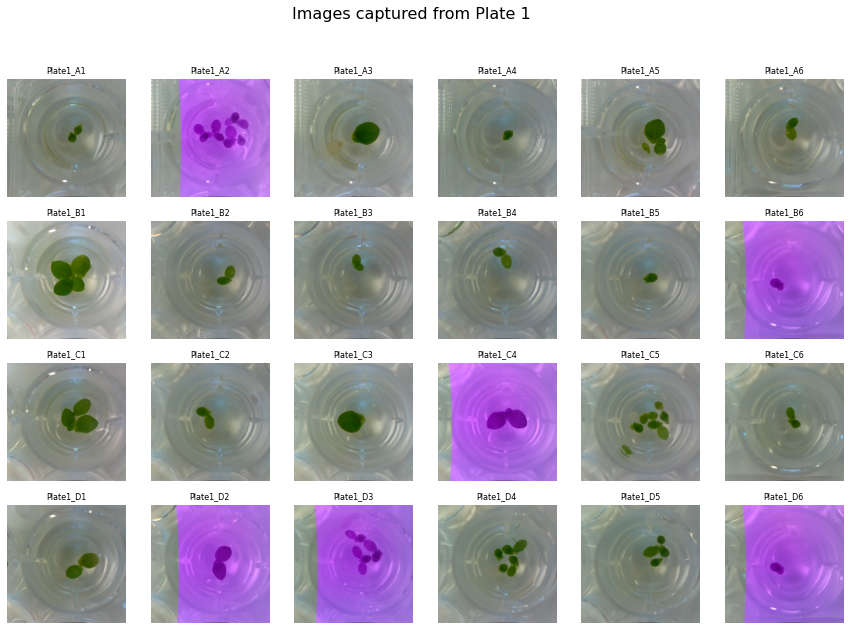

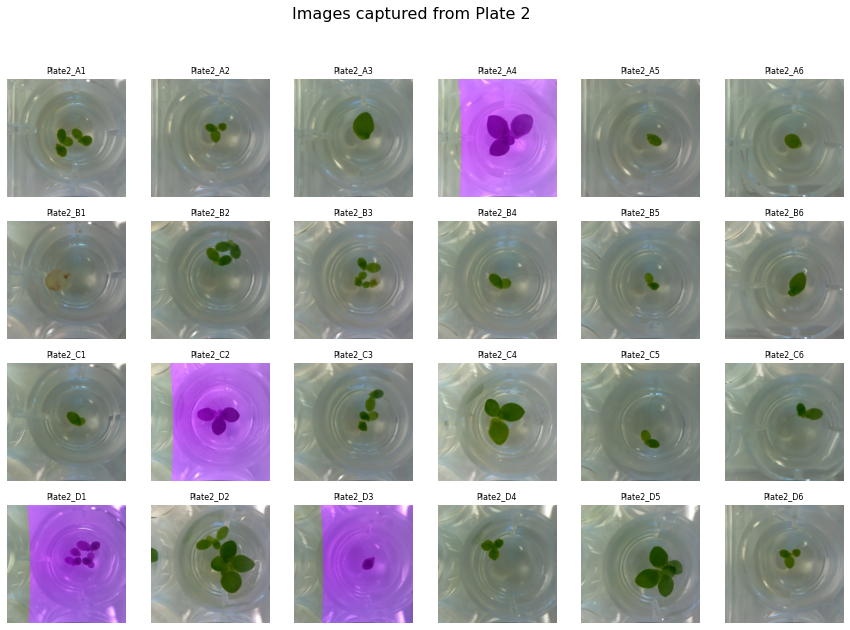

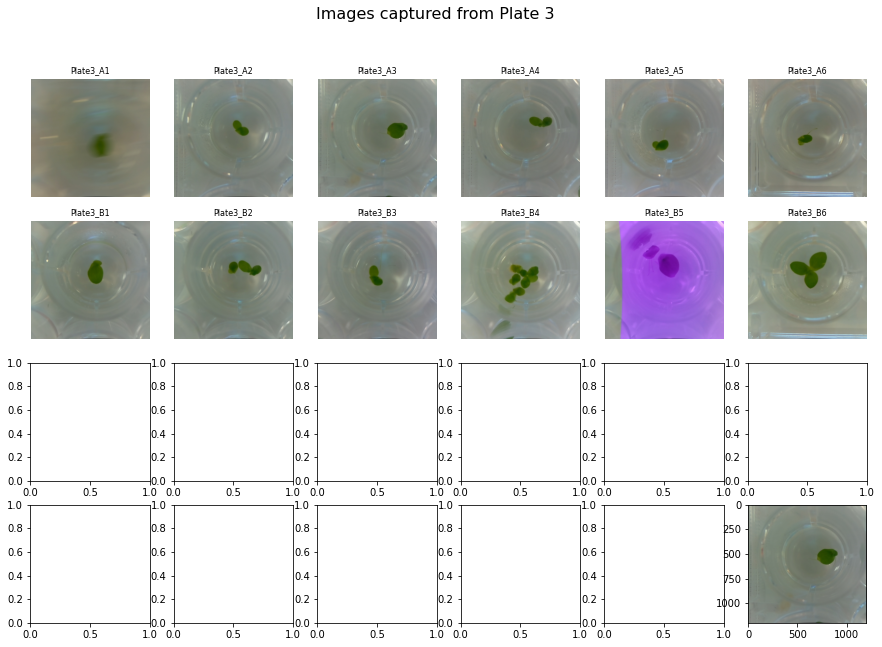

In [5]:
%matplotlib inline
df_with_well_coords = pp.add_well_coords_to_df_from_file(expt_setup_dir, expt_setup_filename)

im.create_plate_image_grid(df_with_well_coords, output_data_dir)

In [8]:
m.moveTo(z=100)
print("Please remove plates from machine then hit any key to continue")
input()

Please remove plates from machine then hit any key to continue
h


'h'

In [ ]:
#TO DO 
#Return tool 
#Prompt user to remove plates
#Home everything. 

In [ ]:
# def move_across_platewells(well_coord_list_of_dicts):
#     for i, well in enumerate(well_coord_list_of_dicts):
#         m.moveTo(x=well["x"], y=well["y"], z=10)
#         ser.write(b'G4 P1000') 

# #TODO make sure it only images wells with duckweed in them. Not crucial since empty wells will be ignored 
# # in data analysis but still its a waste of time and disk space. 
                    
